In [2]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


plt.style.use('seaborn')

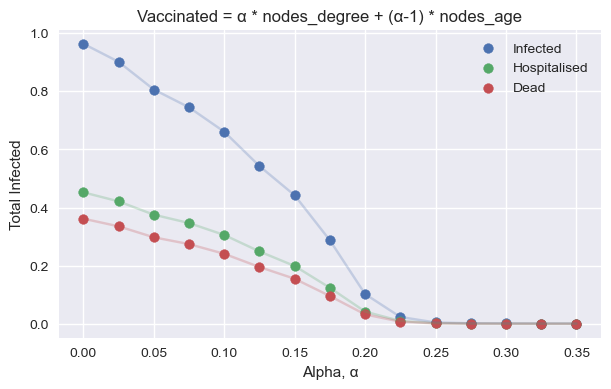

In [3]:
def plot_mixed (run_folder: str, xlim=None):
    run_folder_path = os.path.join(os.path.abspath('../'), 'out', run_folder)
    
    results = {
        'Infected': {
            'Color': 'red',
            'Totals': [],
            'STD': [] 
        },
        'Hospitalised': {
            'Color': 'green',
            'Totals': [],
            'STD': [] 
        },
        'Dead': {
            'Color': 'blue',
            'Totals': [],
            'STD': [] 
        },
    }
    
    for filename in os.listdir(run_folder_path):
        totals_df = pd.read_csv(os.path.join(run_folder_path, filename, 'totals.csv'))
        
        alpha = float(re.match(r'a=(0\.\d+)', filename).groups()[0])
        
        for key in results.keys():
            results[key]['Totals'].append((alpha, totals_df.iloc[-1][key]))
            
    plt.figure(figsize=(7, 4))
    
    for key in results.keys():
        results[key]['Totals'].sort()
        X = [x for x, _ in results[key]['Totals']]
        y = [y for _, y in results[key]['Totals']]
        plt.scatter(X, y, label=key)
        plt.plot(X, y, alpha=0.25)
        
    plt.xlabel('Alpha, α')
    plt.ylabel('Total Infected')
    plt.title('Vaccinated = α * nodes_degree + (α-1) * nodes_age')
    
    if xlim:
        plt.xlim(0, xlim)
    
    plt.legend()
    plt.show()
    
plot_mixed('202959_09032023')

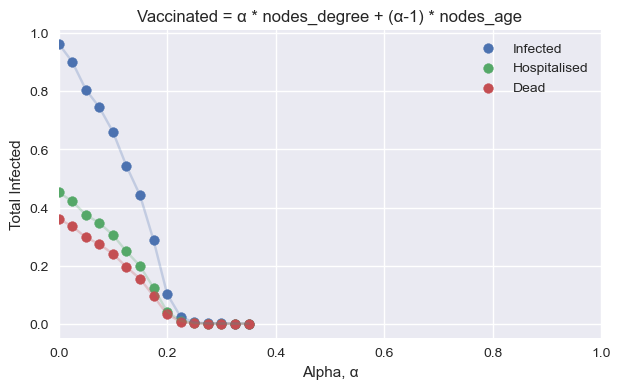

In [4]:
plot_mixed('202959_09032023', xlim=1)